# Loading Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Dataset.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df.index

RangeIndex(start=0, stop=14057, step=1)

# Pre-Training and Testing process

In [20]:
train=pd.read_csv('/content/drive/MyDrive/Dataset.csv')
test=pd.read_csv('/content/drive/MyDrive/Dataset.csv')
train.head()
test.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [21]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (14057, 21)
Test Shape: (14057, 21)


In [23]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057 entries, 0 to 14056
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         14057 non-null  int64  
 1   Restaurant Name       14057 non-null  object 
 2   Country Code          14057 non-null  int64  
 3   City                  14057 non-null  object 
 4   Address               14057 non-null  object 
 5   Locality              14057 non-null  object 
 6   Locality Verbose      14057 non-null  object 
 7   Longitude             14057 non-null  float64
 8   Latitude              14057 non-null  float64
 9   Cuisines              14048 non-null  object 
 10  Average Cost for two  14057 non-null  int64  
 11  Currency              14057 non-null  object 
 12  Has Table booking     14057 non-null  object 
 13  Has Online delivery   14057 non-null  object 
 14  Is delivering now     14057 non-null  object 
 15  Switch to order men

(None, None)

# Data-PreProcessing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057 entries, 0 to 14056
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         14057 non-null  int64  
 1   Restaurant Name       14057 non-null  object 
 2   Country Code          14057 non-null  int64  
 3   City                  14057 non-null  object 
 4   Address               14057 non-null  object 
 5   Locality              14057 non-null  object 
 6   Locality Verbose      14057 non-null  object 
 7   Longitude             14057 non-null  float64
 8   Latitude              14057 non-null  float64
 9   Cuisines              14048 non-null  object 
 10  Average Cost for two  14057 non-null  int64  
 11  Currency              14057 non-null  object 
 12  Has Table booking     14057 non-null  object 
 13  Has Online delivery   14057 non-null  object 
 14  Is delivering now     14057 non-null  object 
 15  Switch to order men

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,1.405700e+04,14057.000000,14057.000000,14057.000000,14057.000000,14057.000000,14057.000000,14057.000000
mean,9.093404e+06,12.799033,66.999960,26.248720,993.513694,1.728249,2.539233,131.071210
std,8.888064e+06,47.474817,35.812835,9.792338,13295.862587,0.873140,1.533947,378.936288
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.015810e+05,1.000000,77.099208,28.526619,250.000000,1.000000,2.000000,4.000000
50%,5.927248e+06,1.000000,77.197804,28.581515,400.000000,1.000000,3.100000,25.000000
75%,1.835816e+07,1.000000,77.286081,28.644572,650.000000,2.000000,3.600000,104.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [12]:
df.shape,df.size

((14057, 21), 295197)

In [14]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [19]:
mean=df.mean
mean()

Restaurant ID           9.093404e+06
Country Code            1.279903e+01
Longitude               6.699996e+01
Latitude                2.624872e+01
Average Cost for two    9.935137e+02
Price range             1.728249e+00
Aggregate rating        2.539233e+00
Votes                   1.310712e+02
dtype: float64

In [24]:
df.set_axis(['Restaurent Id','Restaurent Name','Country Code','City','Address','Locality','Locality verb','Longitude','Latitude','Cuisines','Average cost','Currency','Reservation','Online delivery','Service available','Items menu','Price','Aggregate rating','color','Text','Feedbacks'],inplace=True,axis='columns')


In [25]:
df.head()

,Restaurent Id,Restaurent Name,Country Code,City,Address,Locality,Locality verb,Longitude,Latitude,Cuisines,...,Currency,Reservation,Online delivery,Service available,Items menu,Price,Aggregate rating,color,Text,Feedbacks
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# EDA-Analysis on Cuisine Classifications


 Heat Map! 



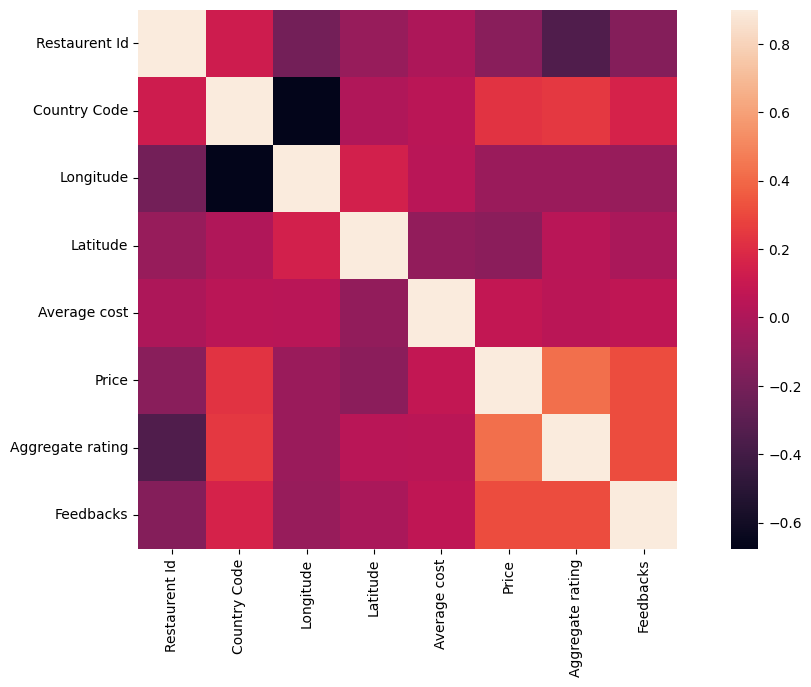

In [26]:
print("\n Heat Map! \n")
plt.figure(figsize=(14,7))
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.9, square=True);
plt.show()

In [27]:
import seaborn as sns
import plotly.express as px

In [46]:
print("\n Cuisines classifications analysis ! \n ")
fig=px.bar(df.head(100), x="Cuisines",y="Feedbacks",color="Price",template="ggplot2")
fig.show()


 Cuisines classifications analysis ! 
 


In [44]:
print("\n Cuisines Items based on Restaurent analysis! \n ")
fig=px.bar(df.head(100), x="Cuisines",y="Price",color="Locality",template="ggplot2")
fig.show()


 Cuisines Items based on Restaurent analysis! 
 


In [55]:
print(" \n Restaurent Prices & Cuisines classifications! \n")
fig = px.line(df, x="Currency", y="Cuisines", color='Average cost',markers=True,color_discrete_sequence=['orange','white'],template='plotly_dark')
fig.show()

 
 Restaurent Prices & Cuisines classifications! 



## Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Cuisines']=le.fit_transform(df['Cuisines'])
df['Price']=le.fit_transform(df['Price'])

In [54]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=l.fit_transform(df[i])

In [62]:
X = df.drop('Aggregate rating',axis=1)
y = df['Aggregate rating']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [56]:
df

,Restaurent Id,Restaurent Name,Country Code,City,Address,Locality,Locality verb,Longitude,Latitude,Cuisines,...,Currency,Reservation,Online delivery,Service available,Items menu,Price,Aggregate rating,color,Text,Feedbacks
0,6317637,3748,162,73,8685,171,172,121.027535,14.565443,920,...,0,1,0,0,0,2,4.8,0,1,314
1,6304287,3172,162,73,6055,593,601,121.014101,14.553708,1111,...,0,1,0,0,0,2,4.5,0,1,591
2,6300002,2896,162,75,4684,308,314,121.056831,14.581404,1671,...,0,1,0,0,0,3,4.4,1,5,270
3,6318506,4707,162,75,8690,862,875,121.056475,14.585318,1126,...,0,0,0,0,0,3,4.9,0,1,365
4,6314302,5523,162,75,8689,862,875,121.057508,14.584450,1122,...,0,1,0,0,0,3,4.8,0,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14052,5915730,4443,208,140,5926,517,523,28.977392,41.022793,1813,...,11,0,0,0,0,2,4.1,1,5,788
14053,5908749,1310,208,140,5962,552,558,29.041297,41.009847,1824,...,11,0,0,0,0,2,4.2,1,5,1034
14054,5915807,3068,208,140,5966,554,561,29.034640,41.055817,1110,...,11,0,0,0,0,3,3.7,5,2,661
14055,5916112,512,208,140,5967,554,561,29.036019,41.057979,1657,...,11,0,0,0,0,3,4.0,1,5,901


# Training & Testing Predictions

In [59]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14057 entries, 0 to 14056
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         14057 non-null  int64  
 1   Restaurant Name       14057 non-null  object 
 2   Country Code          14057 non-null  int64  
 3   City                  14057 non-null  object 
 4   Address               14057 non-null  object 
 5   Locality              14057 non-null  object 
 6   Locality Verbose      14057 non-null  object 
 7   Longitude             14057 non-null  float64
 8   Latitude              14057 non-null  float64
 9   Cuisines              14048 non-null  object 
 10  Average Cost for two  14057 non-null  int64  
 11  Currency              14057 non-null  object 
 12  Has Table booking     14057 non-null  object 
 13  Has Online delivery   14057 non-null  object 
 14  Is delivering now     14057 non-null  object 
 15  Switch to order men

(None, None)

In [60]:
df.isnull().sum()

Restaurent Id        0
Restaurent Name      0
Country Code         0
City                 0
Address              0
Locality             0
Locality verb        0
Longitude            0
Latitude             0
Cuisines             0
Average cost         0
Currency             0
Reservation          0
Online delivery      0
Service available    0
Items menu           0
Price                0
Aggregate rating     0
color                0
Text                 0
Feedbacks            0
dtype: int64

# Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# model testing

ytrain_pred = lr.predict(xtrain)

# evaluating the testing data

mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mse))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 1.18465434802949
RMSE is 1.0884182780666125
R2 score is 0.49884846538401606




In [64]:
ytest_pred = lr.predict(xtest)

# evaluating the training data

mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("the model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

the model performance for training set
--------------------------------------
MSE is 1.1725250690314653
RMSE is 1.0828319671266937
R2 score is 0.4918125277080079




# DecisionTreeRegression

In [65]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(random_state=0)
dtr.fit(xtrain,ytrain)

#predicting the value

ytest_pred=dtr.predict(xtest)

#evaluating the model

from sklearn.metrics import r2_score,mean_squared_error
print("Results for Decision Tree Regression:\n1)Mean Square Error={}\n2)R-Square Score={}".format(mean_squared_error(ytest,ytest_pred),r2_score(ytest,ytest_pred)))

Results for Decision Tree Regression:
1)Mean Square Error=0.02530938833570412
2)R-Square Score=0.9890305849970422


In [67]:
mean=df.mean
mean()

Restaurent Id        9.093404e+06
Restaurent Name      3.653448e+03
Country Code         1.279903e+01
City                 8.147322e+01
Address              4.598322e+03
Locality             7.054204e+02
Locality verb        7.258140e+02
Longitude            6.699996e+01
Latitude             2.624872e+01
Cuisines             1.000164e+03
Average cost         9.935137e+02
Currency             3.984847e+00
Reservation          1.168101e-01
Online delivery      2.618624e-01
Service available    3.556947e-03
Items menu           0.000000e+00
Price                7.282493e-01
Aggregate rating     2.539233e+00
color                3.002490e+00
Text                 1.715515e+00
Feedbacks            1.310712e+02
dtype: float64